In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

TEST_SPLIT_SIZE = .3
RANDOM_STATE = 2055  # Parties in the sky

In [68]:
tf.keras.utils.set_random_seed(RANDOM_STATE)

In [69]:
def plot_losses(history, title):
    last_epoch_loss = history.history['loss'][-1]
    last_epoch_val_loss = history.history['val_loss'][-1]

    figure = plt.figure(figsize=(10, 8))

    axes = figure.add_subplot(1, 1, 1)

    axes.plot(history.history['loss'], color="#003B80", linestyle="dotted",
              label=f"loss entrenamiento {last_epoch_loss:.2f}")
    axes.plot(history.history['val_loss'], color="#003B80", label=f"loss validación {last_epoch_val_loss:.2f}")

    axes.set_xlabel('Época', color="#003B80", fontsize=14)
    axes.set_ylabel('Pérdidas', color="#003B80", fontsize=14)

    axes.set_title(title, fontsize=18)
    axes.set_facecolor('#F0F7FF')
    axes.legend(loc="best")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)
    # axes.set_ylim(ymin=0, ymax=1.1)
    # axes.yaxis.set_major_locator(MultipleLocator(0.1))

    return figure


In [70]:
# Simulating a dataset similar to MNIST
num_classes = 5  # for digits 0-9
vehicle_data = np.genfromtxt("./datos.csv", delimiter=",")

# Generate random data (1000 samples, 28x28 pixels, as in MNIST)
X = vehicle_data[:, 0:-1]
X_train, X_test = train_test_split(X, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE)

y = vehicle_data[:, -1].astype(np.int8)
y = y - 1
y_sparse_train, y_sparse_test = train_test_split(y, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE)

# Convert sparse labels to one-hot encoded labels for categorical_crossentropy
y_categorical = to_categorical(y, num_classes)
y_categorical_train, y_categorical_test = train_test_split(y_categorical, test_size=TEST_SPLIT_SIZE,
                                                           random_state=RANDOM_STATE)


In [71]:
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=[4]),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


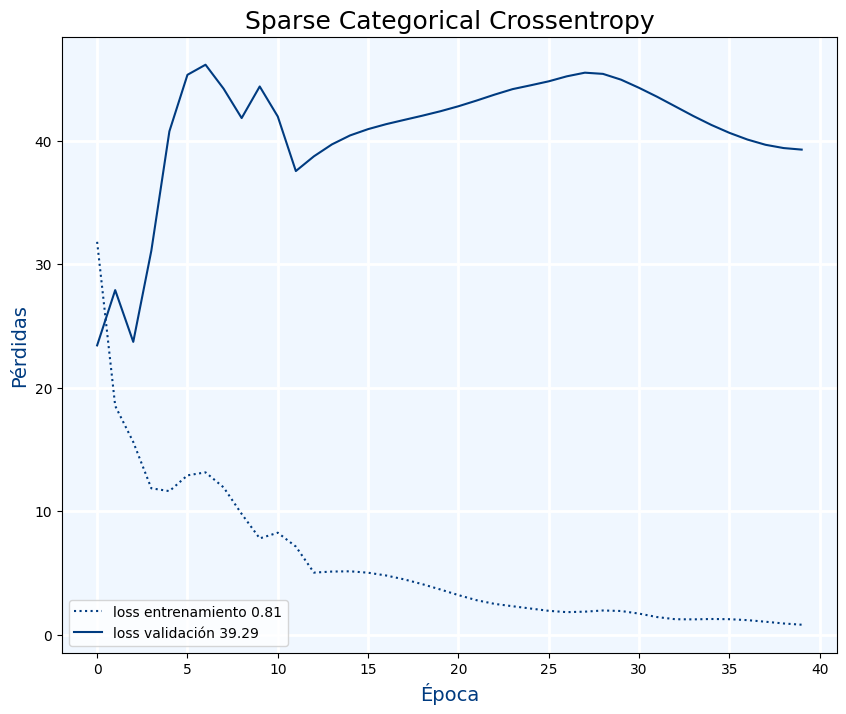

In [72]:
model_sparse = create_model()
model_sparse.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_sparse = model_sparse.fit(X_train, y_sparse_train, validation_data=(X_test, y_sparse_test), epochs=40,
                                  batch_size=32, verbose=False)
_ = plot_losses(history_sparse, "Sparse Categorical Crossentropy")

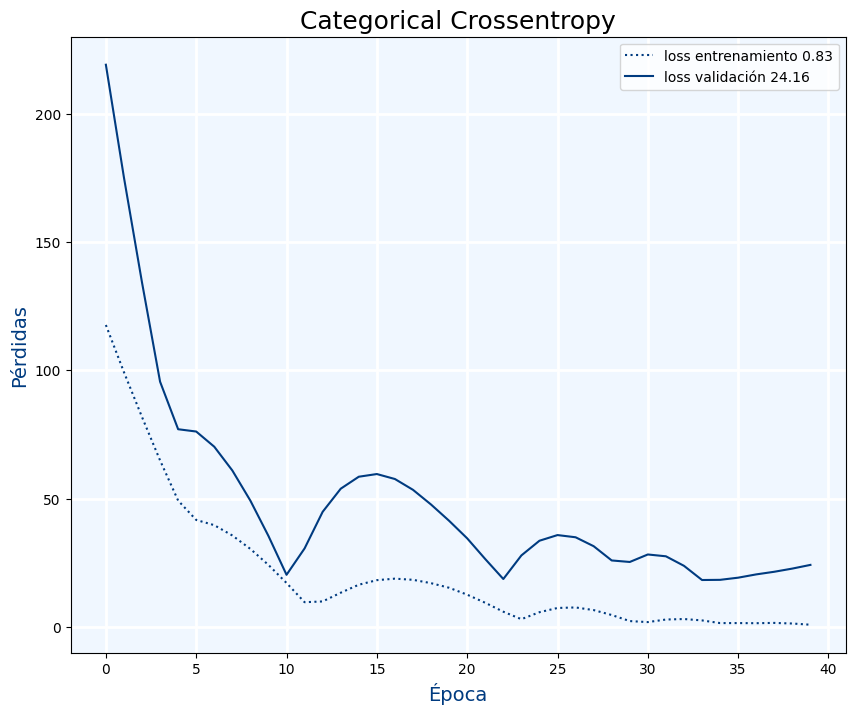

In [73]:
model_categorical = create_model()
model_categorical.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

history_categorical = model_categorical.fit(X_train, y_categorical_train, validation_data=(X_test, y_categorical_test),
                                            epochs=40, batch_size=32, verbose=False)
_ = plot_losses(history_categorical, "Categorical Crossentropy")